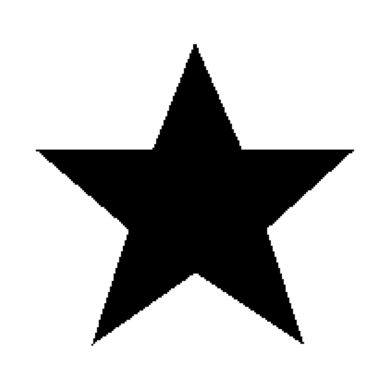

In [3]:
from tool import *

# 读入图像并黑白化
img = imread("2_moore_tracing.png")
img = im_replace(img, (0, 0, 0), (255, 255, 255))
img = im_replace(img, (255, 255, 255), (0, 0, 0), not_equal=True)

Number of Boundary Points: 573
Boundary Points: [(76, 14), (76, 14), (76, 15), (76, 16), (76, 17), (76, 18), (76, 19), (76, 20), (76, 21), (76, 22), (76, 23), (76, 24), (76, 25), (76, 26), (76, 27), (76, 28), (76, 29), (76, 30), (76, 31), (76, 32), (76, 33), (76, 34), (76, 35), (76, 36), (76, 37), (76, 38), (76, 39), (76, 40), (76, 41), (76, 42), (76, 43), (76, 44), (76, 45), (76, 46), (76, 47), (76, 48), (76, 49), (76, 50), (76, 51), (76, 52), (76, 53), (76, 54), (76, 55), (76, 56), (76, 57), (76, 58), (76, 59), (76, 60), (76, 61), (76, 62), (76, 63), (76, 64), (76, 65), (76, 66), (76, 67), (76, 68), (76, 69), (76, 70), (76, 71), (76, 72), (76, 73), (76, 74), (76, 75), (76, 76), (75, 77), (74, 78), (73, 78), (72, 79), (71, 79), (70, 79), (69, 80), (68, 80), (67, 81), (66, 81), (65, 81), (64, 82), (63, 82), (62, 83), (61, 83), (60, 83), (59, 84), (58, 84), (57, 85), (56, 85), (55, 85), (54, 86), (53, 86), (52, 86), (51, 87), (50, 87), (49, 88), (48, 88), (47, 88), (46, 89), (45, 89), (

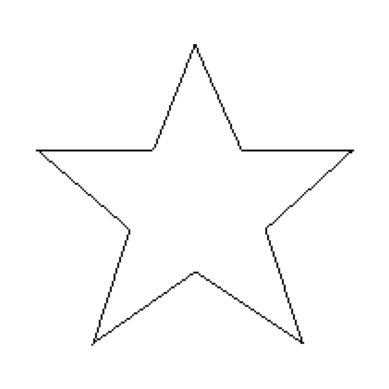

In [4]:
img = img[:, :, 0]
img = np.where(img == 255, 0, 1)


def loopNext(loopingLst: list, currIdx: int):
    """返回下一个下标、下一个元素"""
    nextIdx = currIdx + 1 if currIdx + 1 < len(loopingLst) else 0
    return nextIdx, loopingLst[nextIdx]


def getInitPoint(img):
    """从下到上，从左到右，找到起始点。前景为 1，后景为 0。"""
    M, N = img.shape
    for j in range(N):
        for i in range(M - 1, -1, -1):
            if img[i, j] == 1:
                return i, j


def mooreNeighborhoodTracing(img):
    scanningSeq = [
        ((-1, 1), 5),
        ((0, 1), 7),
        ((1, 1), 7),
        ((1, 0), 1),
        ((1, -1), 1),
        ((0, -1), 3),
        ((-1, -1), 3),
        ((-1, 0), 5),
    ]

    M, N = img.shape

    # 初始化相关参数
    startPoint = getInitPoint(img)
    currPoint = startPoint
    currSeq = 5

    boundaryLst = [currPoint]

    while True:
        # Jocab 终止条件
        if currPoint == startPoint and currSeq == 5 and len(boundaryLst) > 1:
            break

        # 计算下一个点坐标和进入方向
        x, y = currPoint
        nextSeq, ((dx, dy), enterSeq) = loopNext(scanningSeq, currSeq)
        currSeq = nextSeq
        nextPoint = (x + dx, y + dy)

        # 如果下一个点为前景
        if img[nextPoint] == 1:
            # 添加其为边界
            boundaryLst.append(currPoint)
            # 切换当前点
            currPoint = nextPoint
            # 切换进入方向
            currSeq = enterSeq

    # 绘制边界图
    I = np.full((M, N, 3), fill_value=255)
    for point in boundaryLst:
        I[point] = (0, 0, 0)
    imshow(I, OpenCV=False)

    # 返回边界点列表
    return boundaryLst


boundaryLst = mooreNeighborhoodTracing(img)
print(f"Number of Boundary Points:", len(boundaryLst))
print("Boundary Points:", boundaryLst)